# House Sale Price Correlation

## Objectives

* Answer business requirement 1: The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/housing_data_cleaned.csv

## Outputs

* Create a visualisation of the correlation between house attributes and the sale price. Create scatter plots and heat map showing each house attribute and the individual effect
* Save the correlation to outputs/house_prices_study/v1/corr_mrg.csv

## Conclusion

* Correlations have been shown between 10 variables and the sales price to answer business requirement 1.
* There are 7/23 of the variables that are strongly correlated to the sales price.
* The sales prices are skewed to the right.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML-PROJECT/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML-PROJECT'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/housing_data_cleaned.csv"))
df.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856.0,854.0,3.0,1.0,706.0,6.0,150.0,548.0,2.0,2003.0,...,8450.0,65.0,196.0,61.0,5,7,856.0,2003,2003,208500.0
1,1262.0,0.0,3.0,4.0,978.0,5.0,284.0,460.0,2.0,1976.0,...,9600.0,80.0,0.0,0.0,8,6,1262.0,1976,1976,181500.0
2,920.0,866.0,3.0,2.0,486.0,6.0,434.0,608.0,2.0,2001.0,...,11250.0,68.0,162.0,42.0,5,7,920.0,2001,2002,223500.0
3,961.0,0.0,3.0,1.0,216.0,5.0,540.0,642.0,1.0,1998.0,...,9550.0,60.0,0.0,35.0,5,7,756.0,1915,1970,140000.0
4,1145.0,0.0,4.0,3.0,655.0,6.0,490.0,836.0,2.0,2000.0,...,14260.0,84.0,350.0,84.0,5,8,1145.0,2000,2000,250000.0
5,796.0,566.0,1.0,1.0,732.0,6.0,64.0,480.0,1.0,1993.0,...,14115.0,85.0,0.0,30.0,5,5,796.0,1993,1995,143000.0
6,1694.0,0.0,3.0,3.0,1369.0,6.0,317.0,636.0,2.0,2004.0,...,10084.0,75.0,186.0,57.0,5,8,1686.0,2004,2005,307000.0
7,1107.0,983.0,3.0,2.0,859.0,5.0,216.0,484.0,2.0,1973.0,...,10382.0,69.0,240.0,204.0,6,7,1107.0,1973,1973,200000.0
8,1022.0,752.0,2.0,1.0,0.0,1.0,952.0,468.0,1.0,1931.0,...,6120.0,51.0,0.0,0.0,5,7,952.0,1931,1950,129900.0
9,1077.0,0.0,2.0,1.0,851.0,6.0,140.0,205.0,2.0,1939.0,...,7420.0,50.0,0.0,4.0,6,5,991.0,1939,1950,118000.0


---

# Data Understanding 

We are interested in understanding the dataset, checking the variable type and distribution, missing values and what these variables mean to the business

In [5]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

/tmp/ipykernel_8012/962869596.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Study of Correlation

- Compute the corr() spearman method to find relationships between features.
- Extract and sort the top features correlated with sales price.

We use .corr() for spearman method and investigate the top 10 correlations

In [6]:
arr = []

for col in df.columns[df.dtypes!='object'].to_list():
    if col != 'SalePrice':
        df1 = df[df[col]!=0]
        df2 = df1[df1[col].notnull()]
        df3 = df2.filter(['SalePrice', col])
        corr_spearman = df3.corr(method='spearman')['SalePrice'][1:].round(2)
        arr.append(corr_spearman[col])
corr_mrg = pd.Series(index=df.columns[df.dtypes!='object'].drop(['SalePrice']).to_list(), data=arr).sort_values(key=abs, ascending=False)
corr_mrg.head(10)

OverallQual     0.81
GrLivArea       0.73
2ndFlrSF        0.69
KitchenQual     0.67
YearBuilt       0.65
GarageArea      0.61
TotalBsmtSF     0.58
1stFlrSF        0.58
YearRemodAdd    0.57
GarageYrBlt     0.56
dtype: float64

## Visualise Correlation Heatmap

Use a heatmap in descending order to visualise all correlation coefficients above <= 0.4

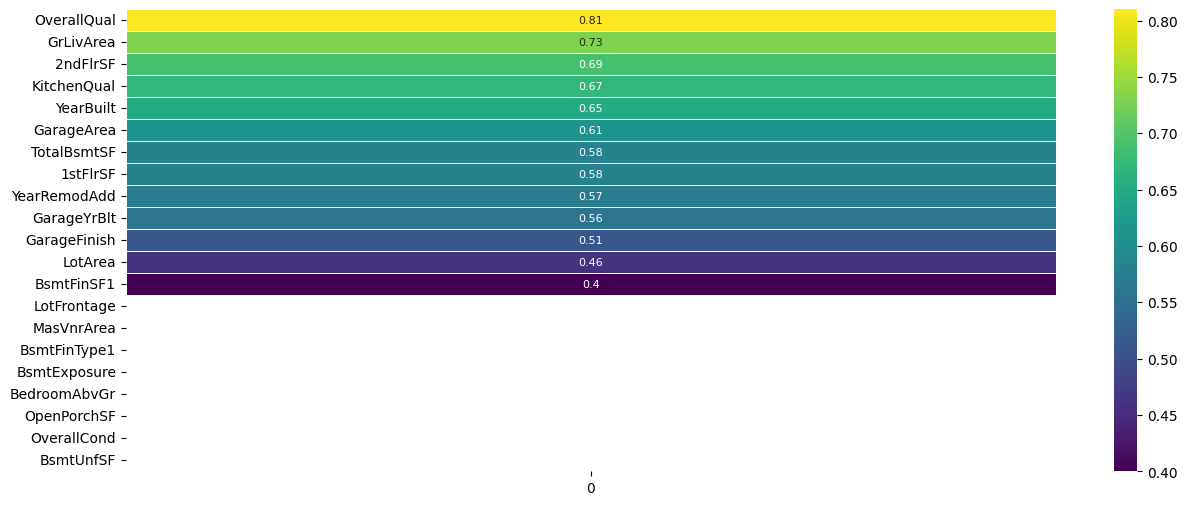

In [7]:
%matplotlib inline

# Turns the 'corr_mrg' series into a DataFrame
corr_mrg = pd.DataFrame(corr_mrg)

fig, axes = plt.subplots(figsize=(15,6))
annot_size = 8

# Create a mask for correlations < 0.4
mask = np.zeros_like(corr_mrg, dtype=bool)
mask[np.abs(corr_mrg) < 0.4] = True

# Plot the data in a heatmap
sns.heatmap(data=corr_mrg, annot=True, xticklabels=True, yticklabels=True,
            mask=mask, cmap='viridis', annot_kws={"size": 8}, ax=axes,
            linewidth=0.5)

plt.show()

 The moderately strong correlation have values in the range 0.4 to 0.6 and the strong correlation have values > 0.6. The house attribute most strongly correlated to the house price with correlation coefficient 0.81 is the overall quality 'OverallQual'.

In [8]:
strong_correlation = ['OverallQual', 'GrLivArea', '2ndFlrSF', 'KitchenQual', 'YearBuilt', 'GarageArea', 'GarageFinish']
moderate_correlation = ['GarageYrBlt', '1stFlrSF', 'TotalBsmtSF', 'YearRemodAdd', 'LotArea', 'LotFrontage', 'BsmtFinSF1']
dtype_dict = {'OverallQual': 'object', 'GrLivArea': 'numeric', '2ndFlrSF': 'numeric', 'KitchenQual': 'object', 'YearBuilt': 'numeric', 'GarageArea': 'numeric', 'GarageFinish': 'object', 'GarageYrBlt': 'numeric', '1stFlrSF': 'numeric', 'TotalBsmtSF': 'numeric', 'YearRemodAdd': 'numeric', 'LotArea': 'numeric', 'LotFrontage': 'numeric', 'BsmtFinSF1': 'numeric'}

# Scatter Plots to Visualise Correlations

I have added trend lines to the scatterplots to create a better visualisation of the trend between each attribute and the house sale price

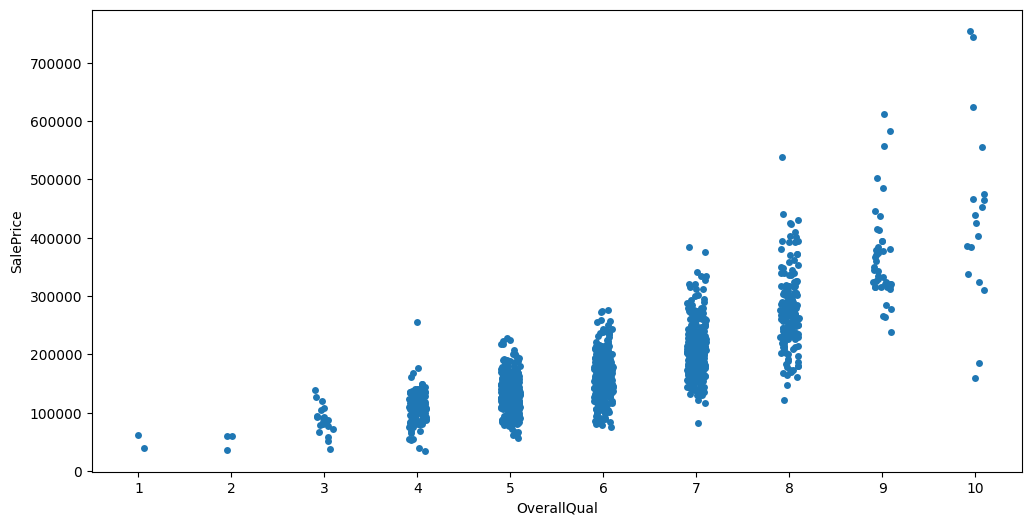

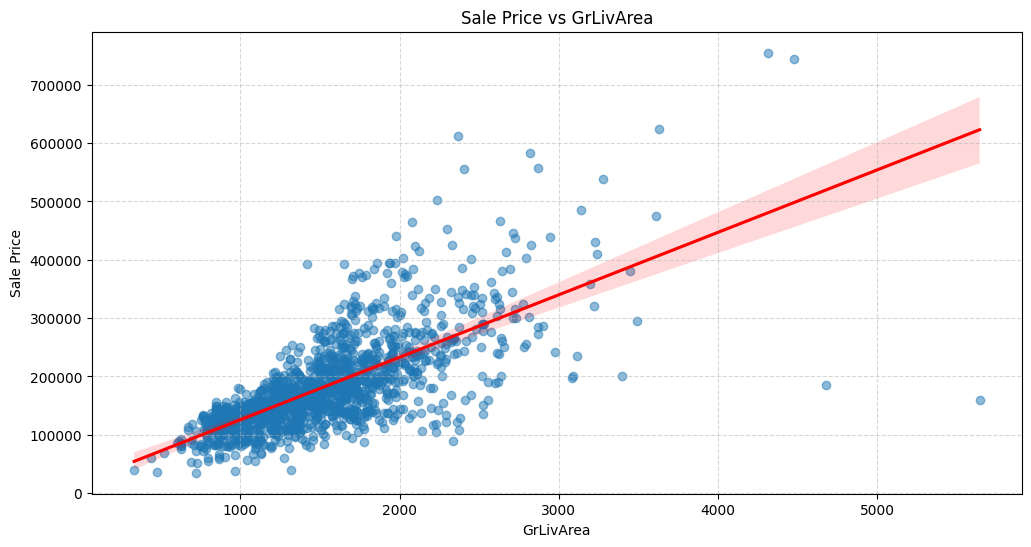

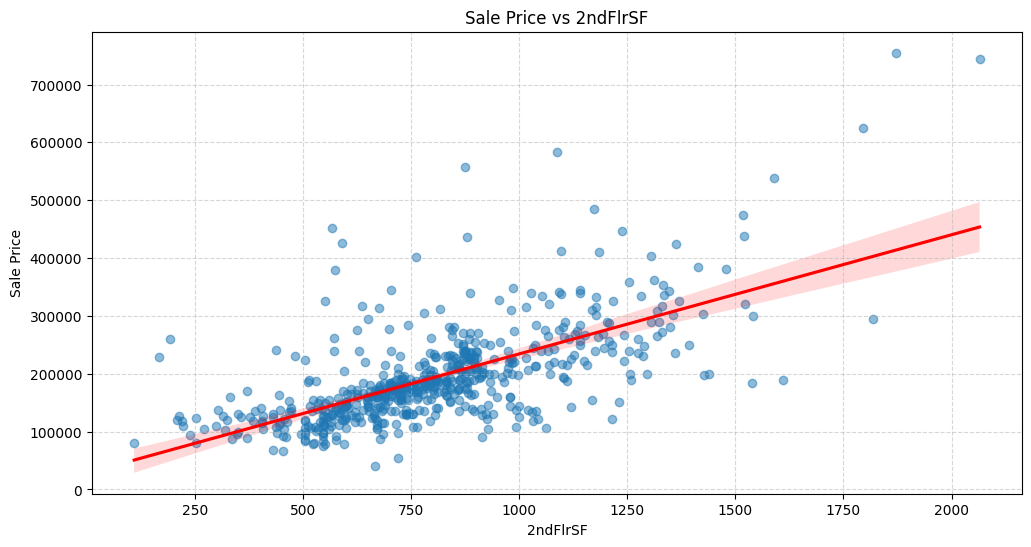

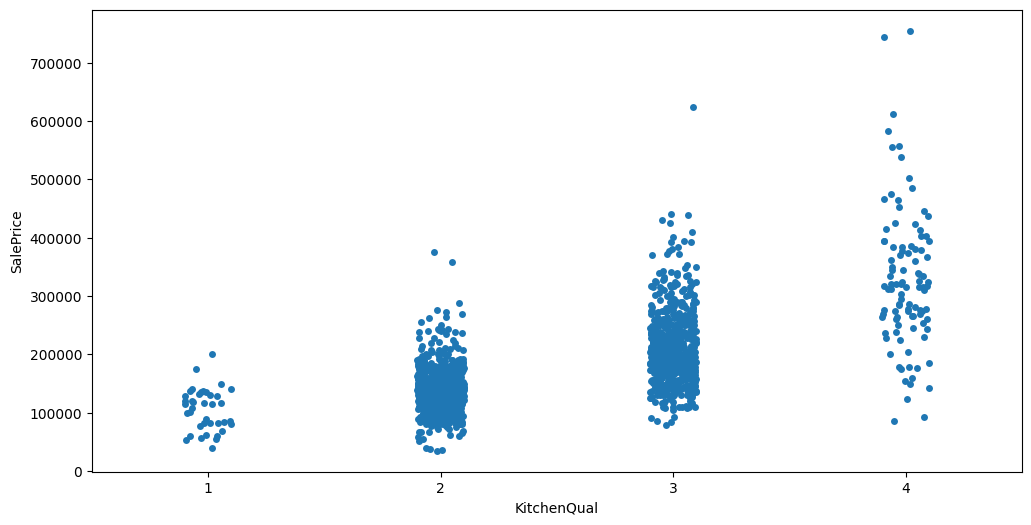

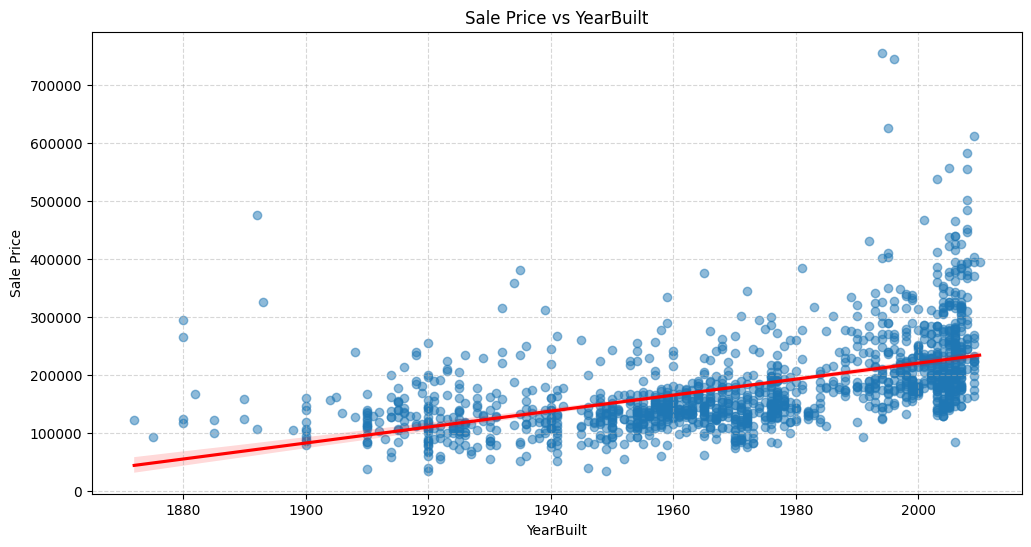

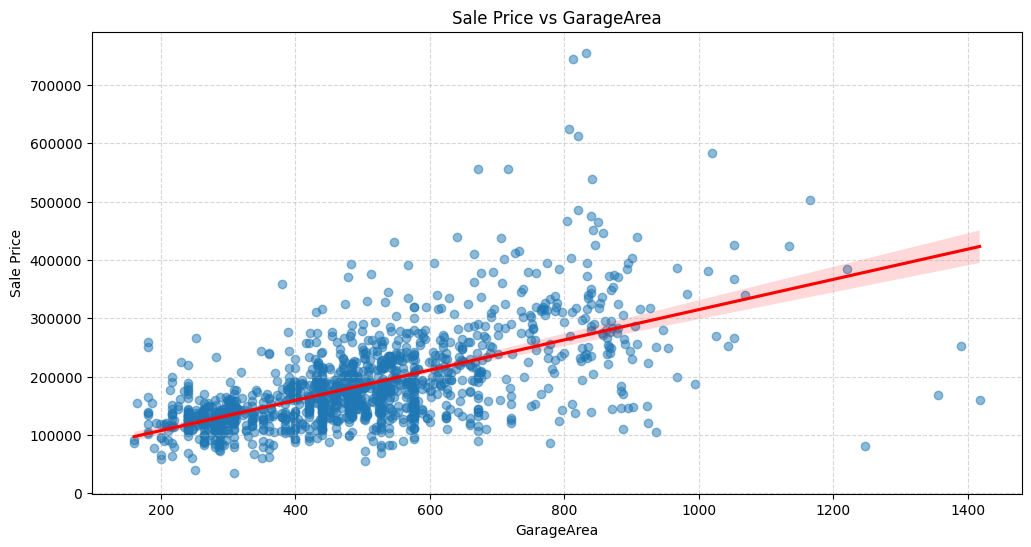

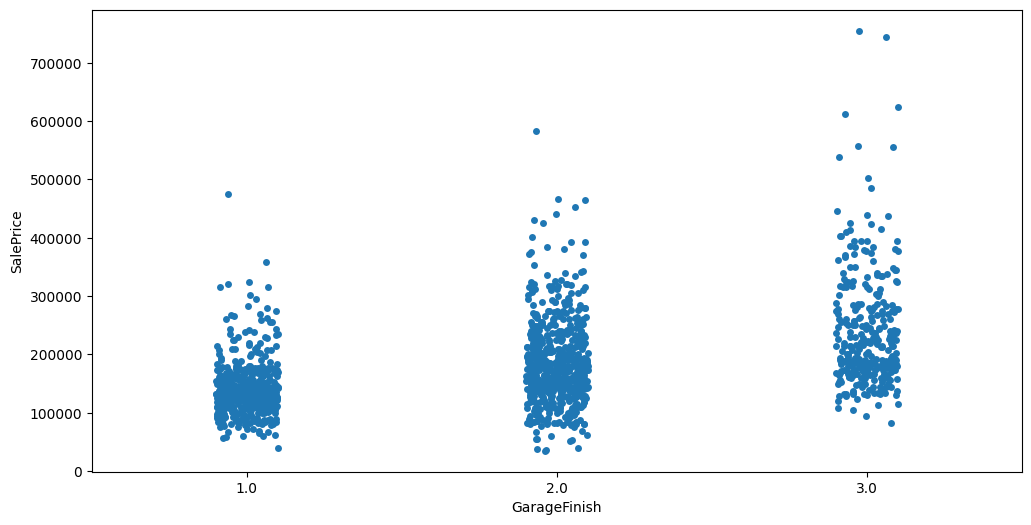

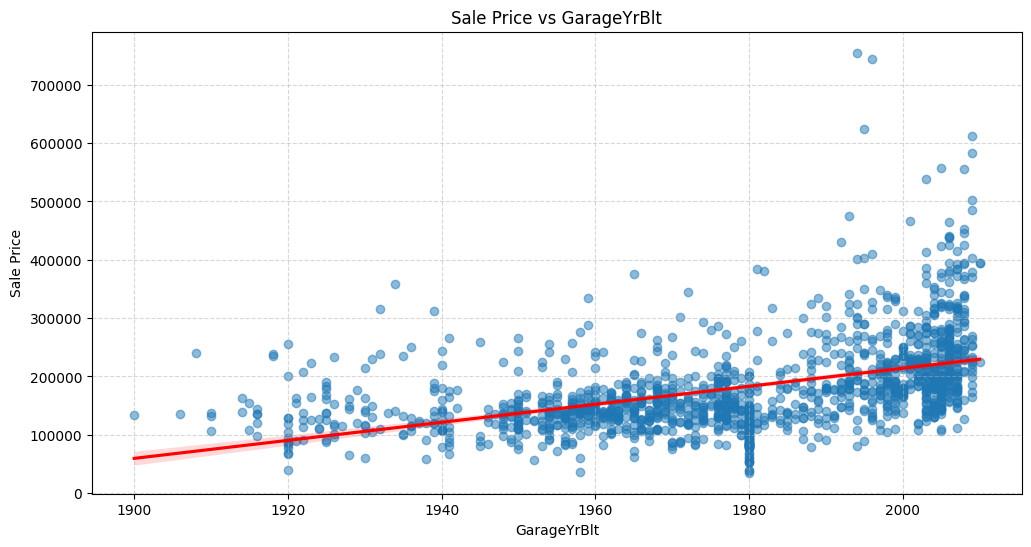

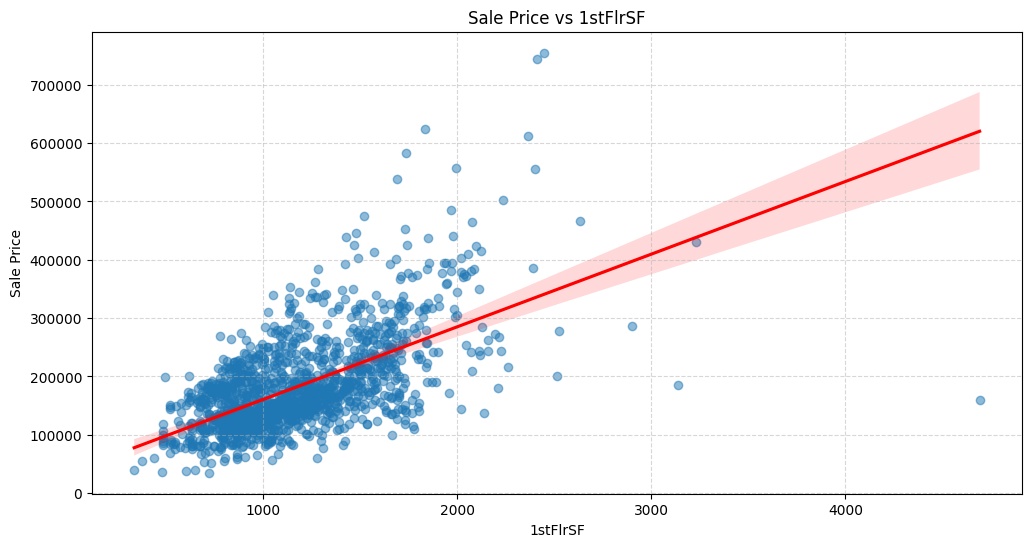

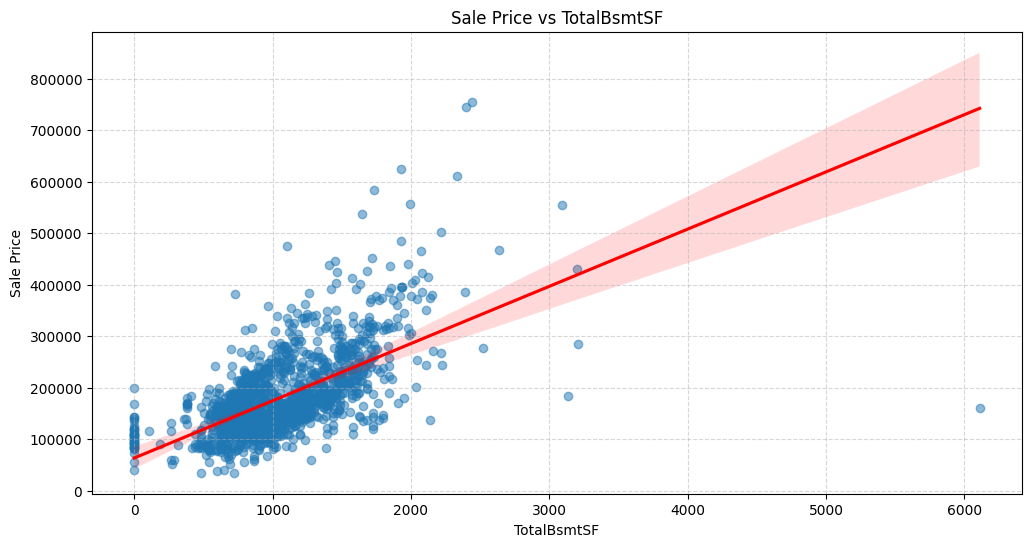

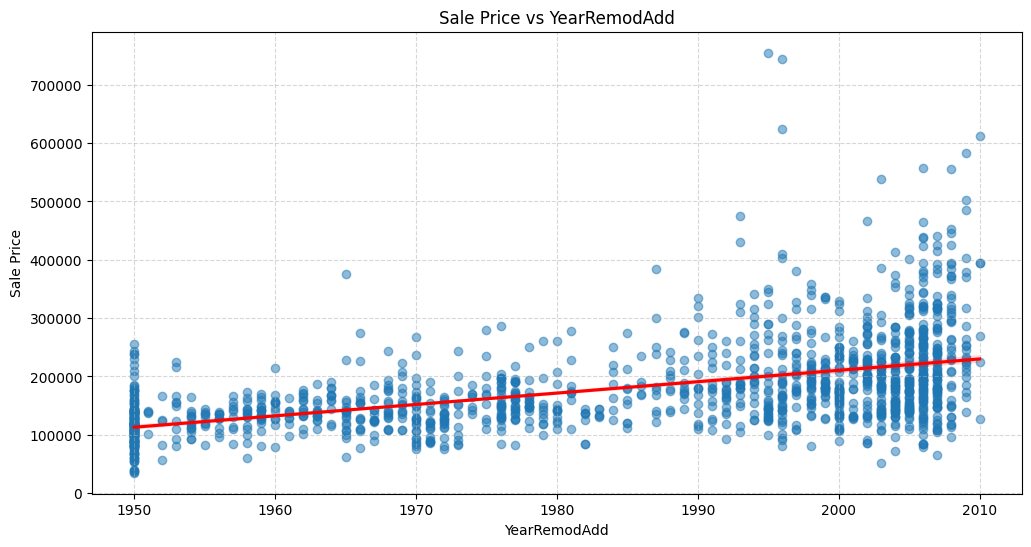

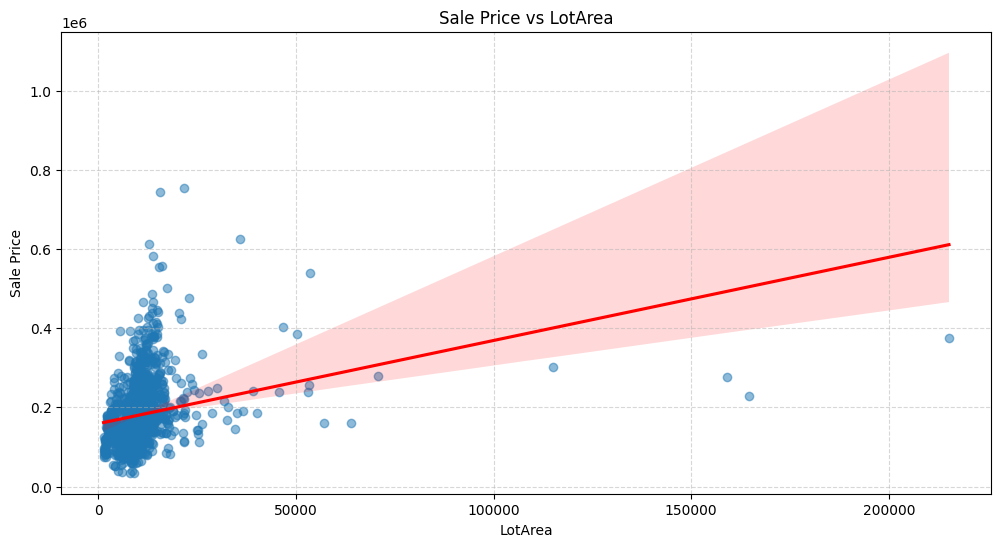

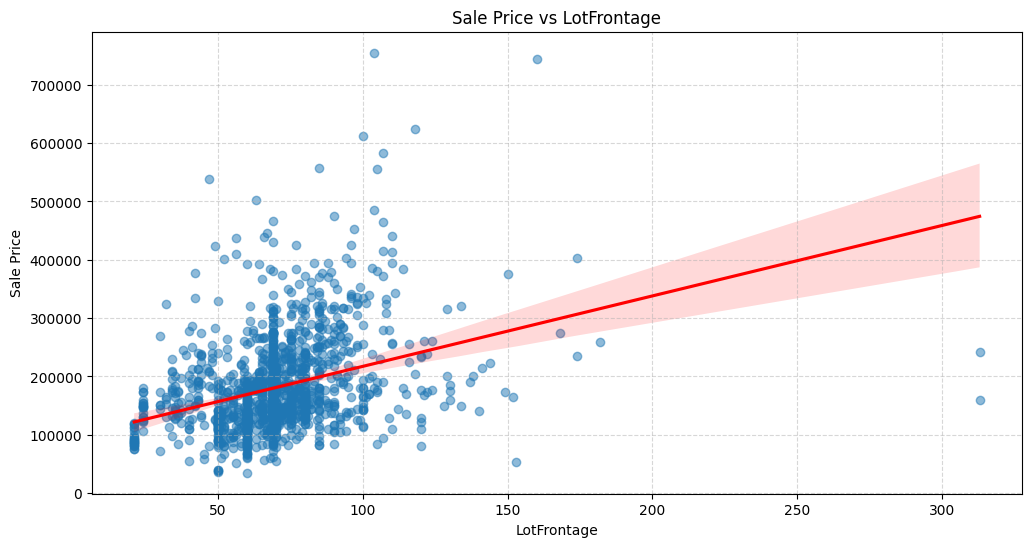

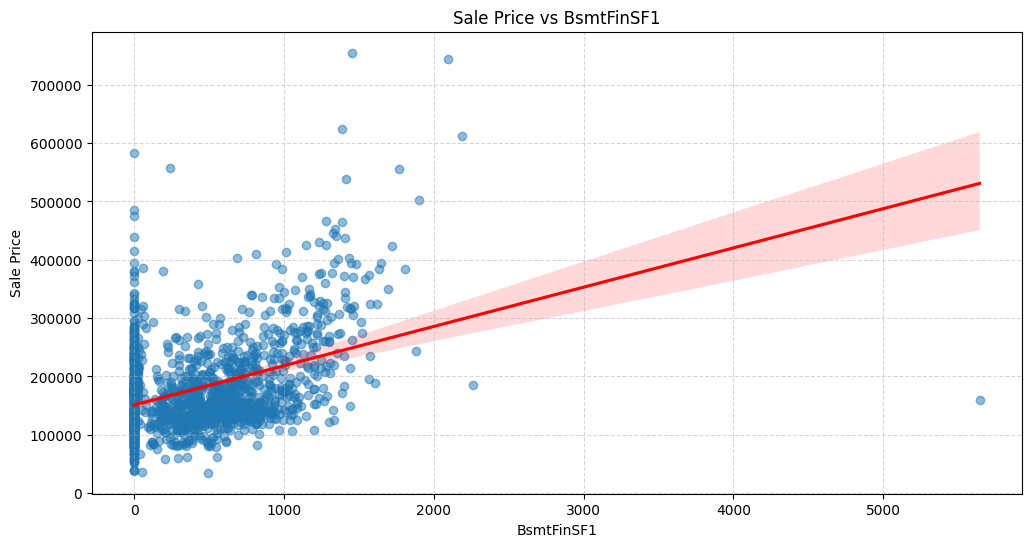

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in strong_correlation:
    if df[col].dtype == 'object':
        df1 = df[df[col] != 'None']
        df2 = df1[df1[col].notnull()]
        df3[col] = df2[col].replace(dic[col])
    else:
        df1 = df[df[col] != 0]
        df3 = df1[df1[col].notnull()]

    if dtype_dict[col] == 'object':
        fig, axes = plt.subplots(figsize=(12,6))
        sns.stripplot(data=df3, x=col, y='SalePrice')
        plt.show()
    elif dtype_dict[col] == 'numeric':
        fig, axes = plt.subplots(figsize=(12,6))
        # Trend line added
        sns.regplot(data=df3, x=col, y='SalePrice', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
        plt.title(f"Sale Price vs {col}")
        plt.xlabel(col)
        plt.ylabel("Sale Price")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

for col in moderate_correlation:
    if df[col].dtype == 'object':
        df1 = df[df[col] != 'None']
        df2 = df1[df1[col].notnull()]
        df3[col] = df2[col].replace(dic[col])
    else:
        df1 = df[df[col] != 0]
        df3 = df1[df1[col].notnull()]

    if dtype_dict[col] == 'object':
        fig, axes = plt.subplots(figsize=(12,6))
        sns.stripplot(data=df, x=col, y='SalePrice')
        plt.show()
    elif dtype_dict[col] == 'numeric':
        fig, axes = plt.subplots(figsize=(12,6))
        # Trend line added
        sns.regplot(data=df, x=col, y='SalePrice', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
        plt.title(f"Sale Price vs {col}")
        plt.xlabel(col)
        plt.ylabel("Sale Price")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()


As we can see the stronger the correlation coefficient the clearer the trend for the house price

---

# Explore House Sale Price Distribution

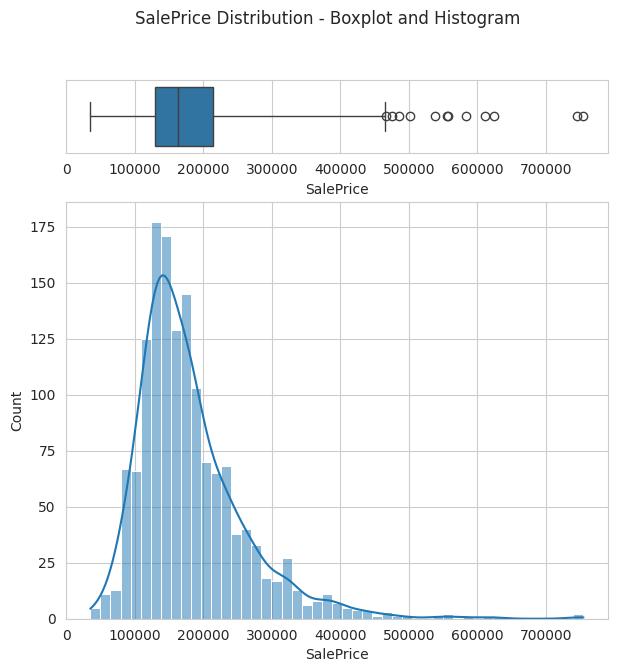

This is the range where a datapoint is not an outlier: from -122100.0 to 466075.0




In [10]:
sns.set_style("whitegrid")
def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0], whis=3)
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    # An outlier is defined to be outside the box in the boxplot by three times the
    # interquantile distance
    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a datapoint is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 3*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 3*IQR).round(2)}")
    print("\n")


df2=df.filter(['SalePrice'])
plot_histogram_and_boxplot(df2)

As we can see the box plot is skewed to the right (upper quantile) due to there being a few outliers.

# Store the correlation coefficient DF

In [11]:
import joblib

version = 'v1'
file_path = f'outputs/house_prices_study/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/house_prices_study/v1'


In [12]:
corr_mrg.to_csv(f"{file_path}/corr_mrg.csv", index=False)

---

NOTE

* Some of the code in this notebook has been taken from the Code Institute lessons and edited to fit my project

---